In [42]:
import pandas as pd
import numpy as np
import json
import os
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# dir: the directory where those json files are stored in, make sure to use the right input
# json_list: the list of json files that you want to merged (the list file name should contain '.json')
#
# One issue: the amount of comments sometimes don't fit with the lenth of edge
def process_json_files(dir, json_list):
    df_list = []
    for i in json_list:
        data = []          
        content = json.load(open(os.path.join(dir, i)))
        data.append({
            'json': i,
            'post_timestamp': content['taken_at_timestamp'],
            'likes': content['edge_media_preview_like']['count'],
            'comments': content['edge_media_to_comment']['count'],
            # 'post_text': content['edge_media_to_caption']['edges'][0]['node']['text'],
            'edge_media_to_comment': content.get('edge_media_to_comment').get('edges'),
            'edge_media_to_sponsor_user': content.get('edge_media_to_sponsor_user'),
            'edge_media_to_tagged_user': content.get('edge_media_to_tagged_user')
        })
        df_list.append(pd.DataFrame(data))
    
    df = pd.concat(df_list, ignore_index=True)
    return df

In [3]:
# Define the folder path
folder_path = "json_sponsored"

# List to store all file names
all_files = []
files_name = []

# Loop through all files in the folder
for filename in os.listdir(folder_path):
  # Append all filenames to the list
  all_files.append(filename)

# Print the list of all files
for file in all_files:
  files_name.append(file)

In [71]:
# an example, more info can be added to the column if needed
# '1496692483702070013.json', '2035014620515122637.json'
df = process_json_files('json_sponsored', files_name)
df

,json,post_timestamp,likes,comments,edge_media_to_comment,edge_media_to_sponsor_user,edge_media_to_tagged_user
0,1913545990682512895.json,1542332479,20,1,None,None,None
1,1627021814282444449.json,1508176136,335,65,"[{'node': {'created_at': 1508238512, 'did_repo...",{'edges': []},{'edges': [{'node': {'user': {'full_name': 'Da...
2,1968412919332625543.json,1548873127,13943,191,"[{'node': {'created_at': 1548945328, 'did_repo...",{'edges': []},{'edges': [{'node': {'user': {'full_name': 'Ch...
3,1673650135042873556.json,1513734665,2162,22,None,None,None
4,1981302736398706316.json,1550409713,107,0,None,None,None
...,...,...,...,...,...,...,...
221705,1984596852439553679.json,1550802402,466,18,None,None,None
221706,1898214295435509180.json,1540504799,32,0,None,None,None
221707,1930766741128112201.json,1544385353,1015,14,None,None,None
221708,1764262865425669327.json,1524536544,765,55,None,None,None


In [89]:
COLUMN = ['post_timestamp', 'likes', 'comments']
df_ = df[COLUMN]

In [90]:
# Check data types and missing values
print(df_.info())

# Descriptive statistics for numerical columns
print(df_.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221710 entries, 0 to 221709
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   post_timestamp  221710 non-null  int64
 1   likes           221710 non-null  int64
 2   comments        221710 non-null  int64
dtypes: int64(3)
memory usage: 5.1 MB
None
       post_timestamp         likes       comments
count    2.217100e+05  2.217100e+05  221710.000000
mean     1.531421e+09  3.916492e+03      79.833228
std      1.675260e+07  3.745030e+04    1709.989671
min      1.336427e+09  0.000000e+00       0.000000
25%      1.523538e+09  2.630000e+02       9.000000
50%      1.534336e+09  7.590000e+02      27.000000
75%      1.543233e+09  1.944000e+03      65.000000
max      1.557245e+09  5.008538e+06  675587.000000


In [91]:
df_['post_timestamp'] = df_['post_timestamp'].apply(lambda d:dt.datetime.fromtimestamp(d).strftime('%Y-%m-%d %H:%M:%S'))

df_

/var/folders/c_/6jt_vlf55f91p67q18x96hlr0000gn/T/ipykernel_36754/996440973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['post_timestamp'] = df_['post_timestamp'].apply(lambda d:dt.datetime.fromtimestamp(d).strftime('%Y-%m-%d %H:%M:%S'))


,post_timestamp,likes,comments
0,2018-11-15 20:41:19,20,1
1,2017-10-16 13:48:56,335,65
2,2019-01-30 13:32:07,13943,191
3,2017-12-19 20:51:05,2162,22
4,2019-02-17 08:21:53,107,0
...,...,...,...
221705,2019-02-21 21:26:42,466,18
221706,2018-10-25 17:59:59,32,0
221707,2018-12-09 14:55:53,1015,14
221708,2018-04-23 22:22:24,765,55


In [74]:
df_.sort_values('post_timestamp')

,post_timestamp,likes,comments
215260,2012-05-07 17:35:56,4,0
46629,2013-05-14 19:17:48,76,5
62744,2014-03-04 15:21:28,10,1
24341,2014-03-16 05:54:43,96,11
79702,2014-04-15 10:07:16,12,0
...,...,...,...
60622,2019-05-06 15:16:09,116,5
68245,2019-05-06 16:07:51,2193,59
182342,2019-05-06 18:38:39,229,11
102677,2019-05-07 10:38:29,899,48


In [76]:
# Convert timestamp to datetime
df_['post_timestamp'] = pd.to_datetime(df_['post_timestamp'])

# Extract year, month, day, hour
df_['year'] = df_['post_timestamp'].dt.year
df_['month'] = df_['post_timestamp'].dt.month
df_['day'] = df_['post_timestamp'].dt.day
df_['hour'] = df_['post_timestamp'].dt.hour
df_['minute'] = df_['post_timestamp'].dt.minute
df_['second'] = df_['post_timestamp'].dt.second


df_

/var/folders/c_/6jt_vlf55f91p67q18x96hlr0000gn/T/ipykernel_36754/3486160260.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['post_timestamp'] = pd.to_datetime(df_['post_timestamp'])
/var/folders/c_/6jt_vlf55f91p67q18x96hlr0000gn/T/ipykernel_36754/3486160260.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['year'] = df_['post_timestamp'].dt.year
/var/folders/c_/6jt_vlf55f91p67q18x96hlr0000gn/T/ipykernel_36754/3486160260.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

,post_timestamp,likes,comments,year,month,day,hour,minute,second
0,2018-11-15 20:41:19,20,1,2018,11,15,20,41,19
1,2017-10-16 13:48:56,335,65,2017,10,16,13,48,56
2,2019-01-30 13:32:07,13943,191,2019,1,30,13,32,7
3,2017-12-19 20:51:05,2162,22,2017,12,19,20,51,5
4,2019-02-17 08:21:53,107,0,2019,2,17,8,21,53
...,...,...,...,...,...,...,...,...,...
221705,2019-02-21 21:26:42,466,18,2019,2,21,21,26,42
221706,2018-10-25 17:59:59,32,0,2018,10,25,17,59,59
221707,2018-12-09 14:55:53,1015,14,2018,12,9,14,55,53
221708,2018-04-23 22:22:24,765,55,2018,4,23,22,22,24


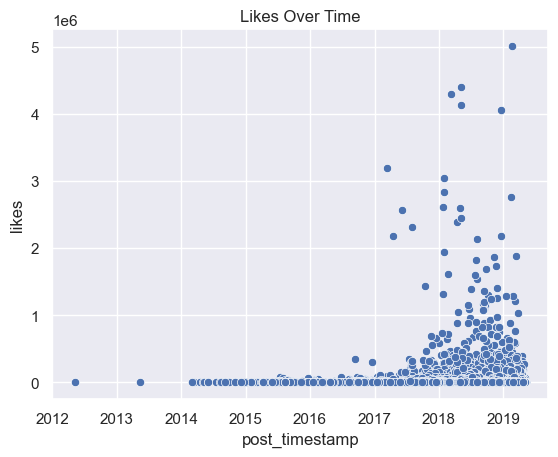

In [77]:
# Time series plot
sns.scatterplot(x='post_timestamp', y='likes', data=df_)
plt.title('Likes Over Time')
plt.grid(True)
plt.show()

In [78]:
toplike = df_.sort_values(by='likes', ascending=False).head(100)
toplike

,post_timestamp,likes,comments,year,month,day,hour,minute,second
107873,2019-02-20 08:59:50,5008538,35416,2019,2,20,8,59,50
14111,2018-05-08 00:13:21,4404705,20118,2018,5,8,0,13,21
8179,2018-03-10 22:09:20,4289037,18116,2018,3,10,22,9,20
69436,2018-05-05 18:53:29,4131812,26985,2018,5,5,18,53,29
76585,2018-12-20 16:06:06,4050350,51589,2018,12,20,16,6,6
...,...,...,...,...,...,...,...,...,...
186218,2018-04-13 16:17:40,478267,2464,2018,4,13,16,17,40
70378,2018-03-05 17:08:18,462699,3247,2018,3,5,17,8,18
148179,2017-10-21 11:48:59,460733,2685,2017,10,21,11,48,59
21827,2018-12-10 17:13:40,460664,2009,2018,12,10,17,13,40


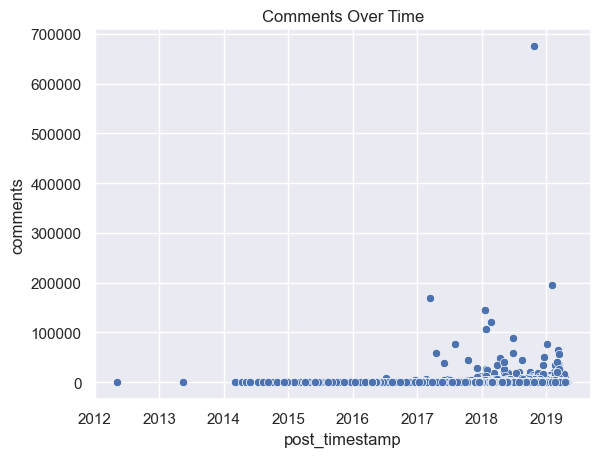

In [79]:
# Time series plot
sns.scatterplot(x='post_timestamp', y='comments', data=df_)
plt.title('Comments Over Time')
plt.grid(True)
plt.show()

In [80]:
topcomment = df_.sort_values(by='comments', ascending=False).head(100)
topcomment

,post_timestamp,likes,comments,year,month,day,hour,minute,second
31263,2018-10-26 01:29:38,417066,675587,2018,10,26,1,29,38
102985,2019-02-04 13:53:01,25967,194996,2019,2,4,13,53,1
75169,2017-03-14 12:00:23,3194477,169030,2017,3,14,12,0,23
6807,2018-01-22 10:57:02,2604490,145990,2018,1,22,10,57,2
183931,2018-02-21 18:49:15,1617923,120488,2018,2,21,18,49,15
...,...,...,...,...,...,...,...,...,...
47012,2018-06-19 19:00:03,1095877,7519,2018,6,19,19,0,3
212349,2018-09-14 20:37:17,1363159,7470,2018,9,14,20,37,17
163655,2018-08-21 10:16:14,34963,7430,2018,8,21,10,16,14
178728,2019-02-10 12:01:28,5687,7389,2019,2,10,12,1,28


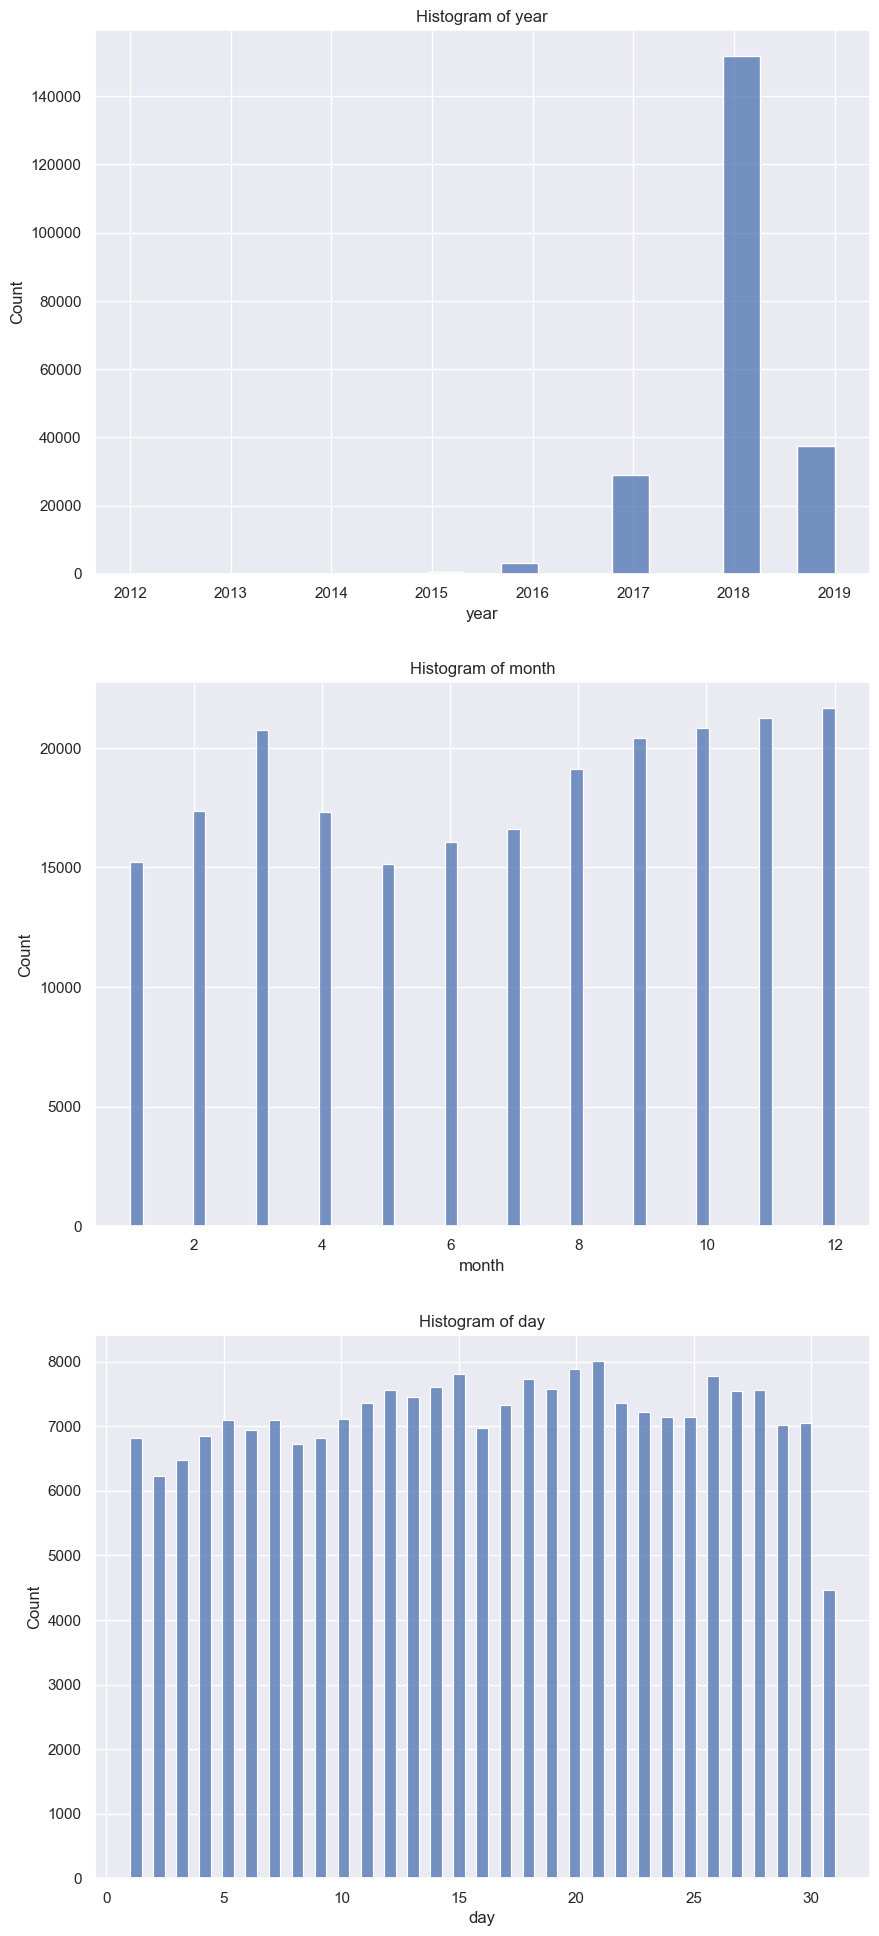

In [81]:
sns.set(font_scale=1)

fig, ax = plt.subplots(3, 1, figsize=(10, 4*6))

sns.histplot(data=df_, x="year", ax=ax[0])
ax[0].title.set_text('Histogram of year')

sns.histplot(data=df_, x="month", ax=ax[1])
ax[1].title.set_text('Histogram of month')

sns.histplot(data=df_, x="day", ax=ax[2])
ax[2].title.set_text('Histogram of day')


plt.show()

In [92]:
# sns.set(font_scale=1)

# fig, ax = plt.subplots(4, 1, figsize=(10, 4*6))

# sns.barplot(x=df_.year, y=df_.groupby('year')['likes'].mean(), ax=ax[0], palette='Blues')
# ax[0].title.set_text('Average number of likes by years')

# sns.barplot(x=df_.month, y=df_.groupby('month')['likes'].mean(), ax=ax[1], palette='Blues')
# ax[1].title.set_text('Average number of likes by months')

# sns.barplot(x=df_.day, y=df_.groupby('day')['likes'].mean(), ax=ax[2], palette='Blues')
# ax[2].title.set_text('Average number of likes by days')

# sns.barplot(x=df_.hour, y=df_.groupby('hour')['likes'].mean(), ax=ax[3], palette='Blues')
# ax[3].title.set_text('Average number of likes by hours')

# plt.show()

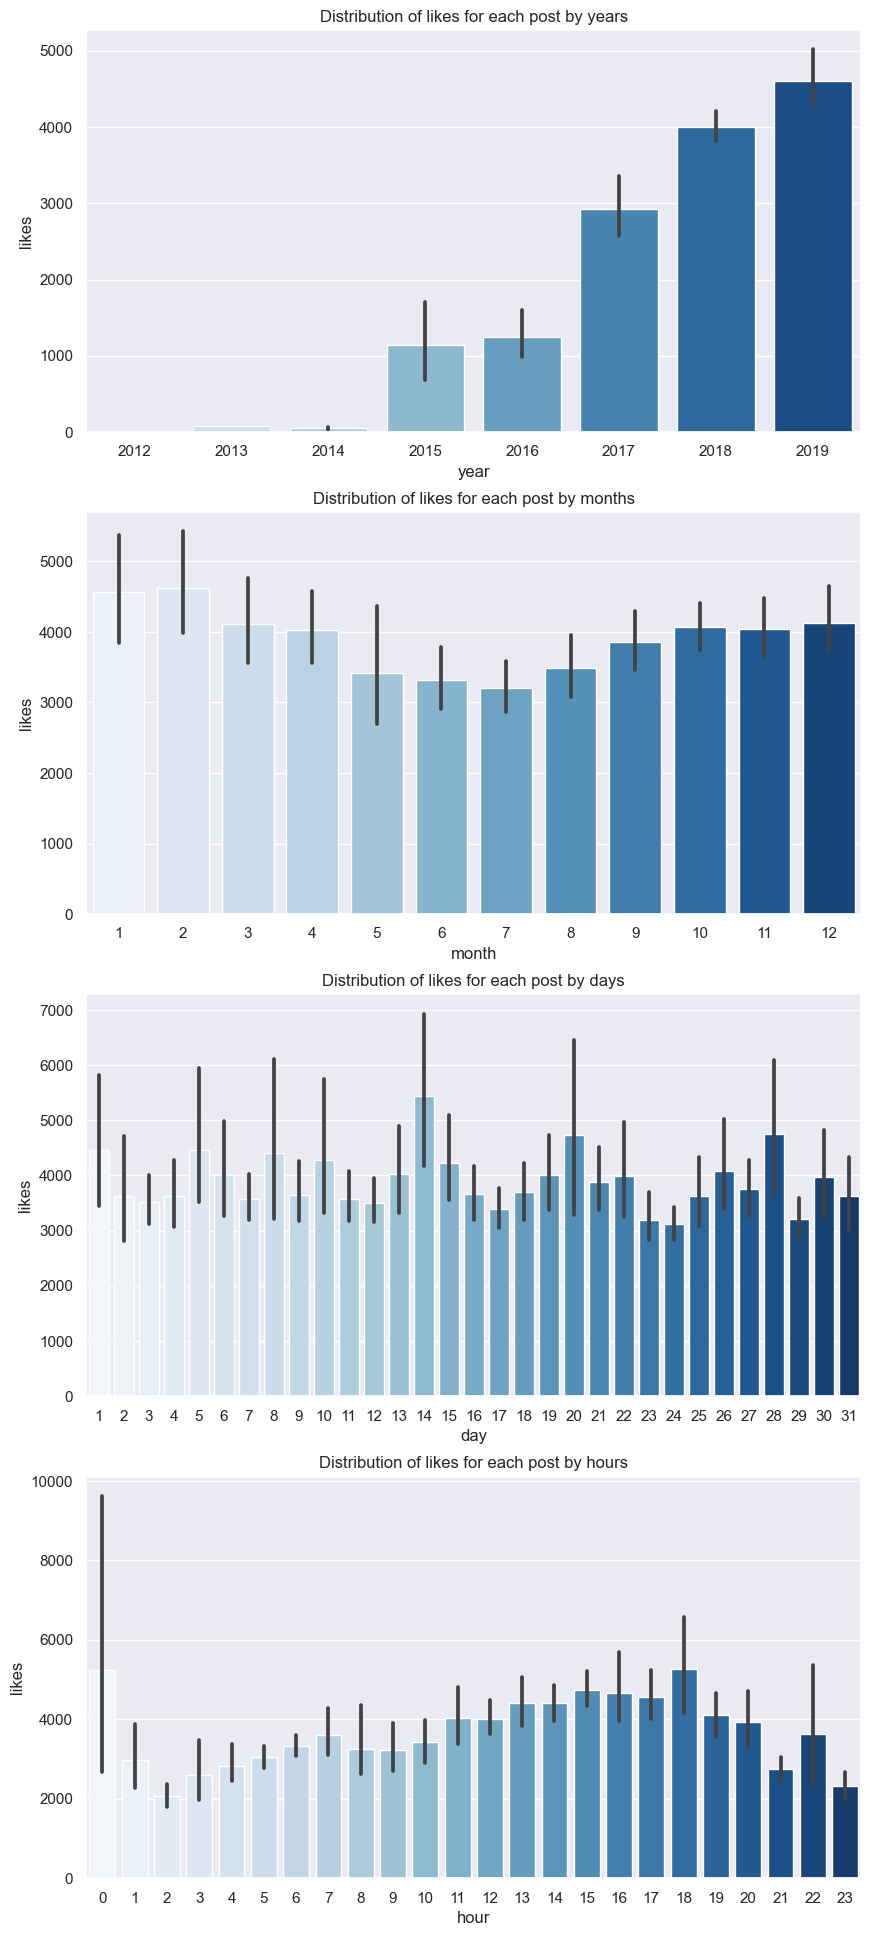

In [83]:
sns.set(font_scale=1)

fig, ax = plt.subplots(4, 1, figsize=(10, 4*6))

sns.barplot(x=df_.year, y=df.likes, ax=ax[0], palette='Blues')
ax[0].title.set_text('Distribution of likes for each post by years')

sns.barplot(x=df_.month, y=df.likes, ax=ax[1], palette='Blues')
ax[1].title.set_text('Distribution of likes for each post by months')

sns.barplot(x=df_.day, y=df.likes, ax=ax[2], palette='Blues')
ax[2].title.set_text('Distribution of likes for each post by days')

sns.barplot(x=df_.hour, y=df.likes, ax=ax[3], palette='Blues')
ax[3].title.set_text('Distribution of likes for each post by hours')

plt.show()

<Axes: xlabel='year', ylabel='likes'>

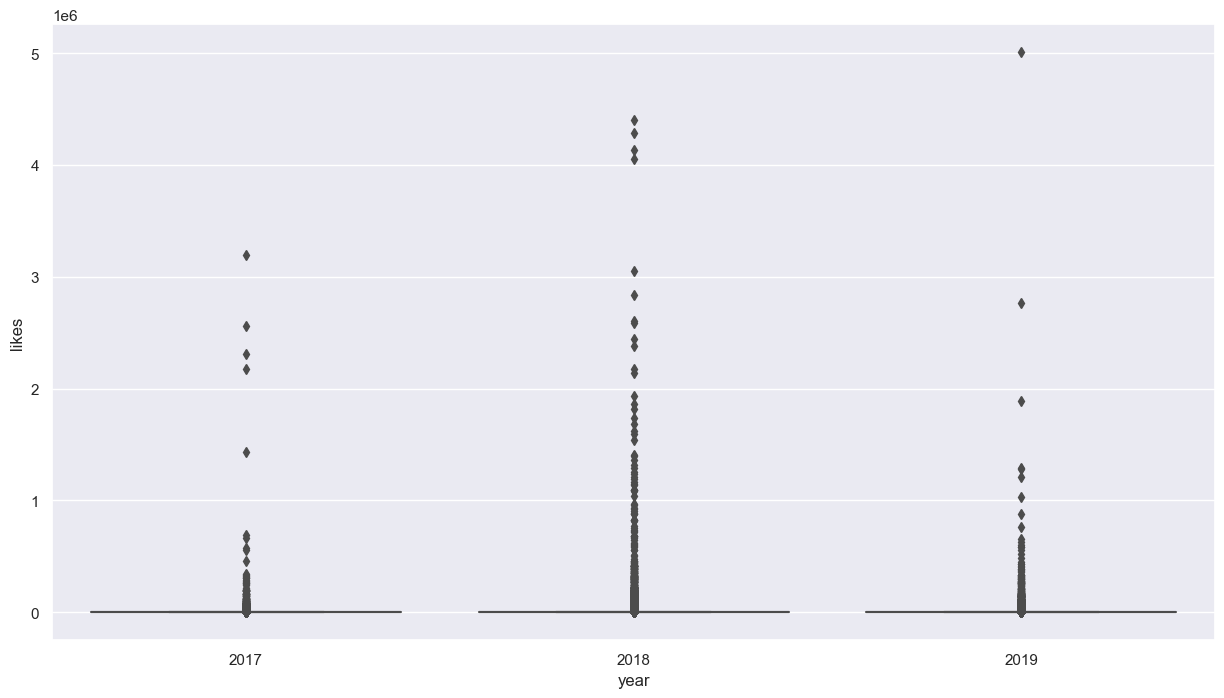

In [84]:
new = df_.loc[df_['year'].isin(toplike['year'].unique())]
plt.figure(figsize=(15,8))
sns.boxplot(x='year', y='likes', data=new)

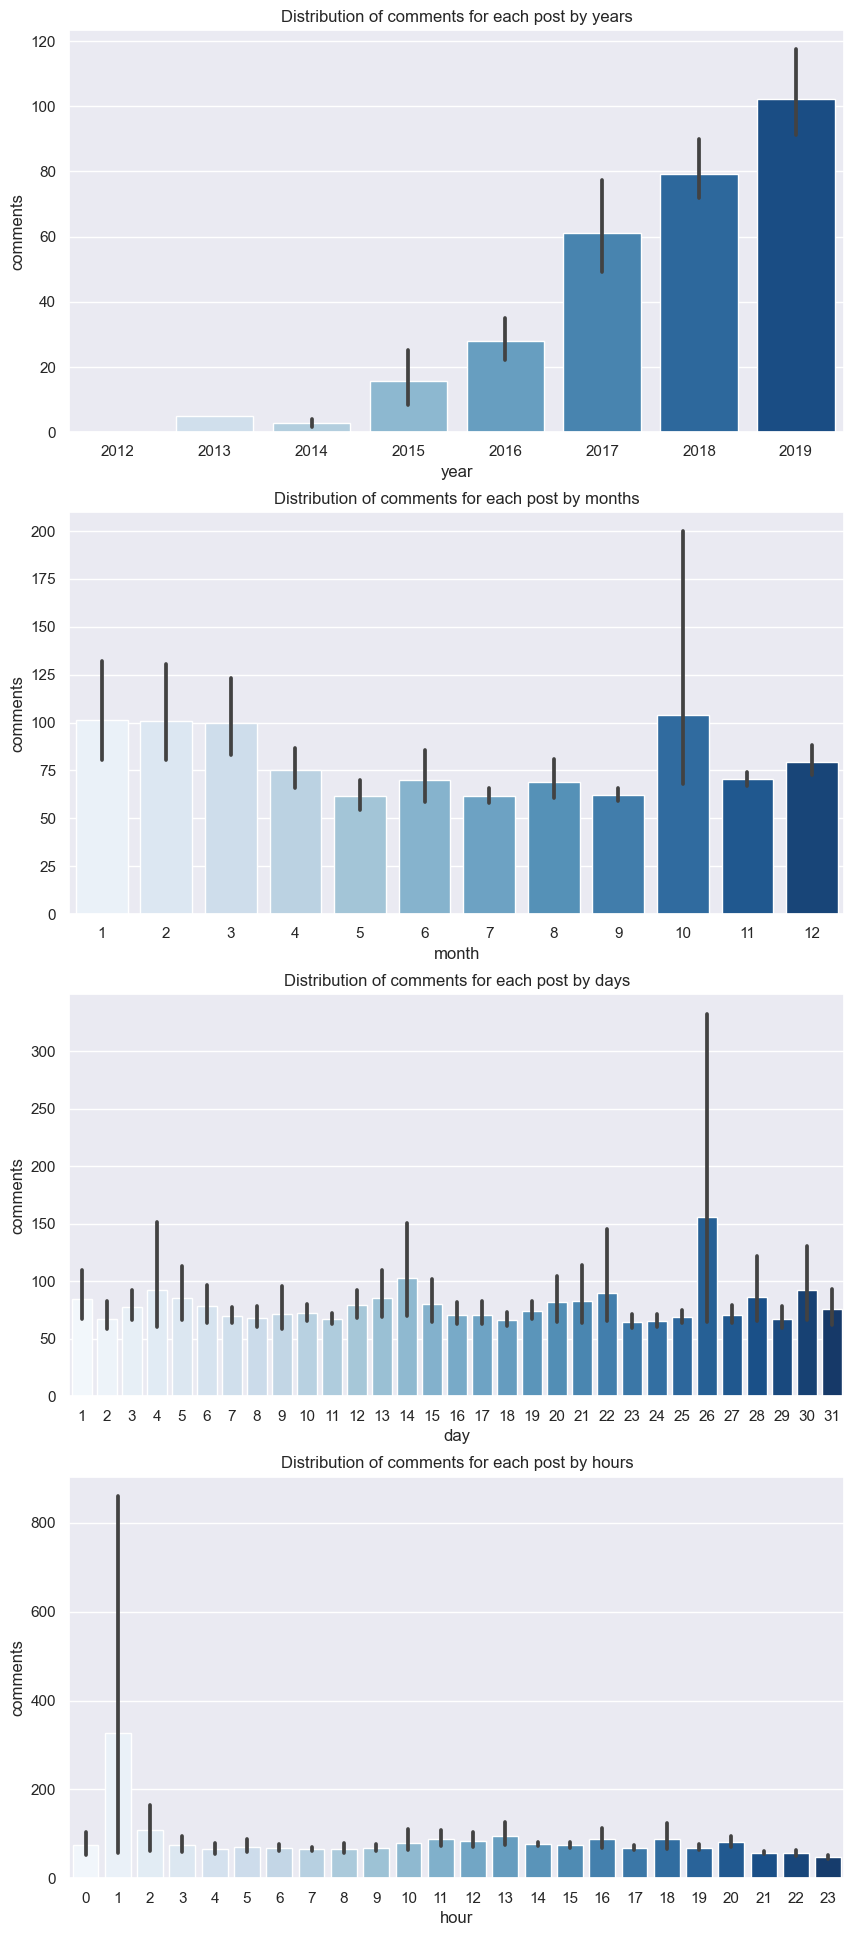

In [85]:
sns.set(font_scale=1)

fig, ax = plt.subplots(4, 1, figsize=(10, 4*6))

sns.barplot(x=df_.year, y=df.comments, ax=ax[0], palette='Blues')
ax[0].title.set_text('Distribution of comments for each post by years')

sns.barplot(x=df_.month, y=df.comments, ax=ax[1], palette='Blues')
ax[1].title.set_text('Distribution of comments for each post by months')

sns.barplot(x=df_.day, y=df.comments, ax=ax[2], palette='Blues')
ax[2].title.set_text('Distribution of comments for each post by days')

sns.barplot(x=df_.hour, y=df.comments, ax=ax[3], palette='Blues')
ax[3].title.set_text('Distribution of comments for each post by hours')

plt.show()

In [86]:
def plot_agg_simple(agg_name="Average", agg_function=np.mean, ci = 75):
    STEP = 0.1
    plt.figure(figsize=(20, 8))
    frame = df_.groupby('month')['likes'].apply(agg_function)

    sns.lineplot(data=df_, x='month', y='likes', estimator=agg_function, errorbar=('ci', ci), color='#A788B5')
    plt.plot(frame.argmax()+1, frame.max(), color='red', markersize=10, marker='o')
    # plt.text(frame.argmax()+1 + STEP, frame.max(), f'MAX()={round(frame.max())} | {months[frame.argmax()]}', color='red', weight='bold')
    plt.plot(frame.argmin()+1, frame.min(), color='blue', markersize=10, marker='o')
    # plt.text(frame.argmin()+1 + STEP, frame.min(), f'MIN()={round(frame.min())} | {months[frame.argmin()]}', color='blue', weight='bold')
    plt.title(f"{agg_name} number of likes by month ({ci}% confidence interval)")
    plt.show()

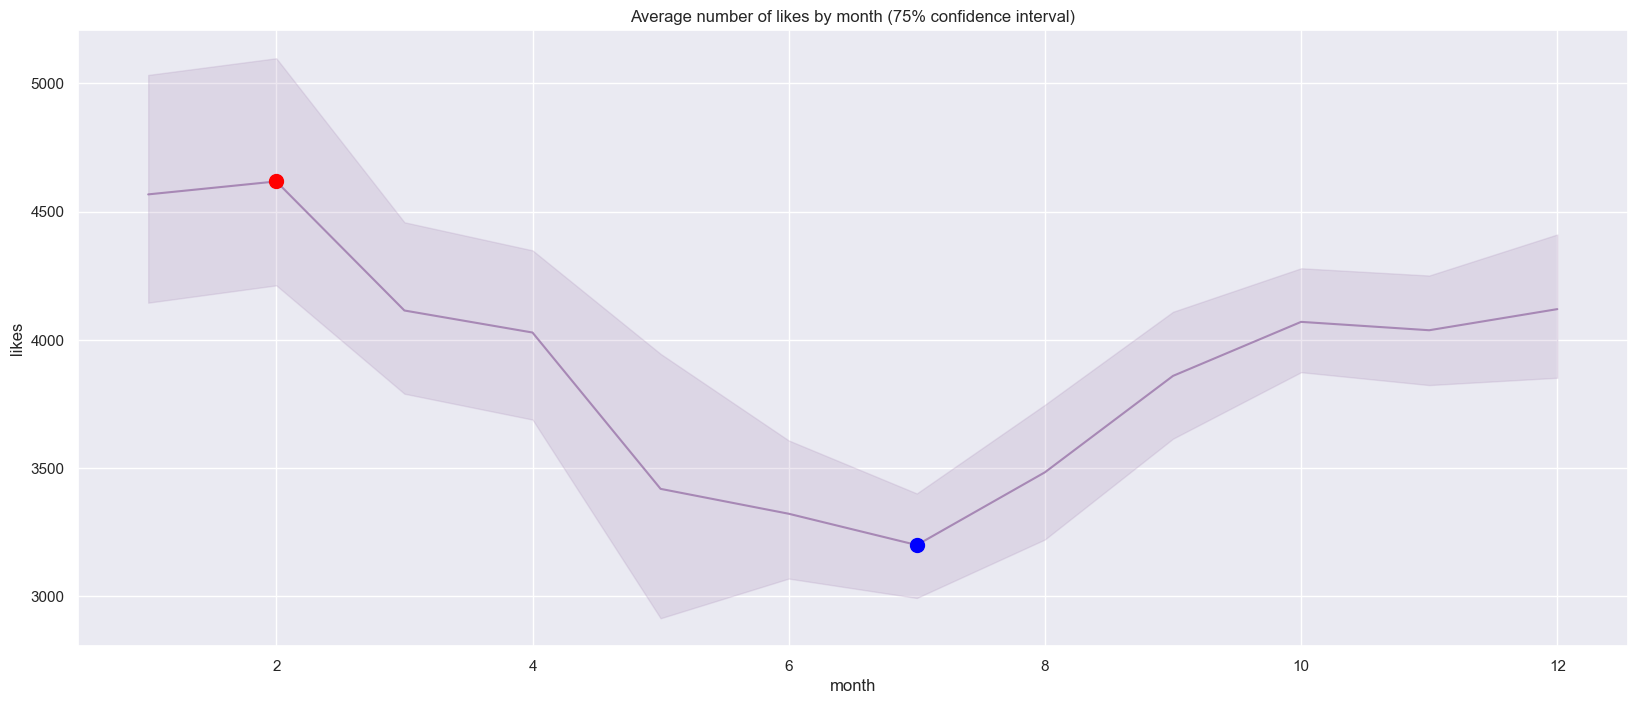

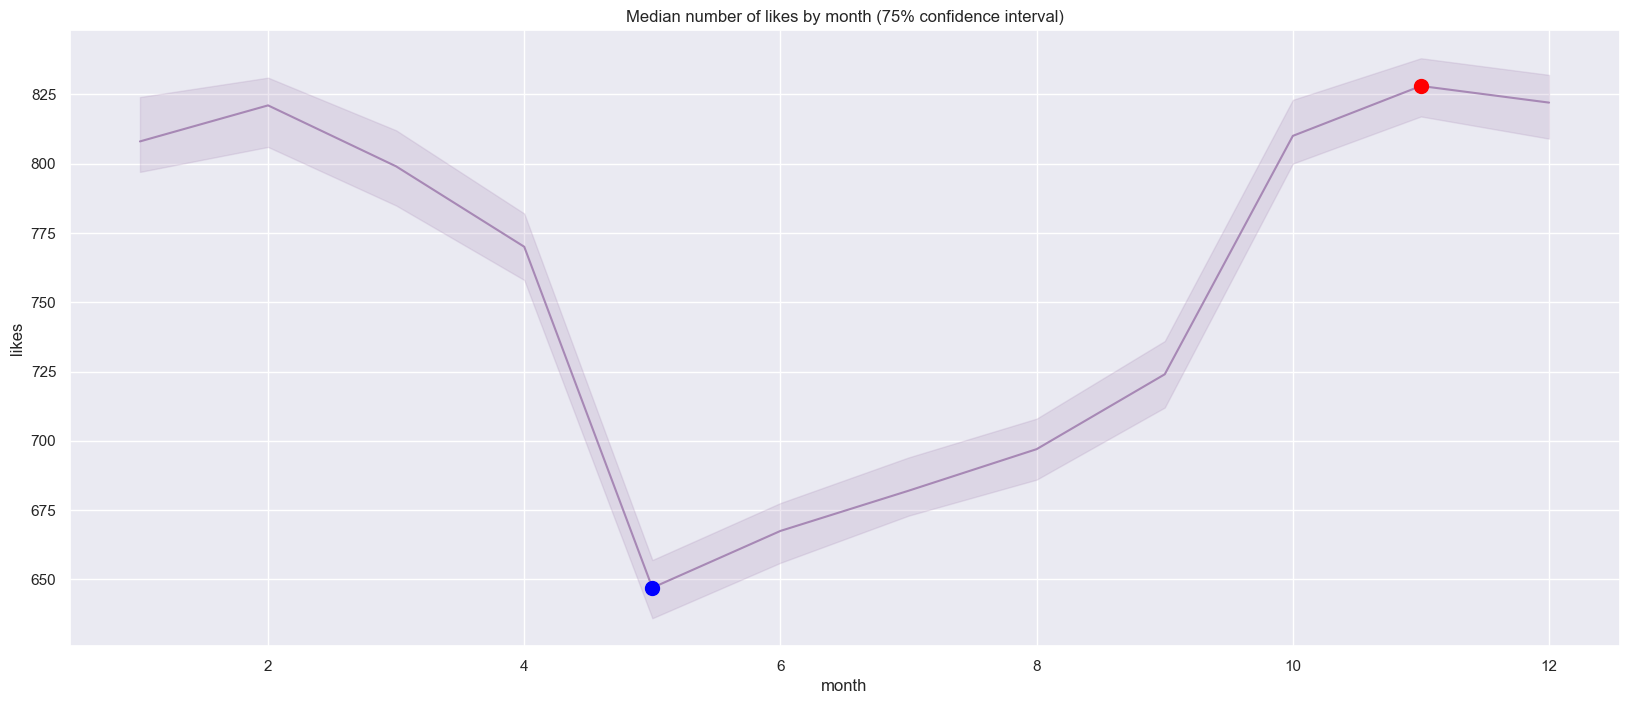

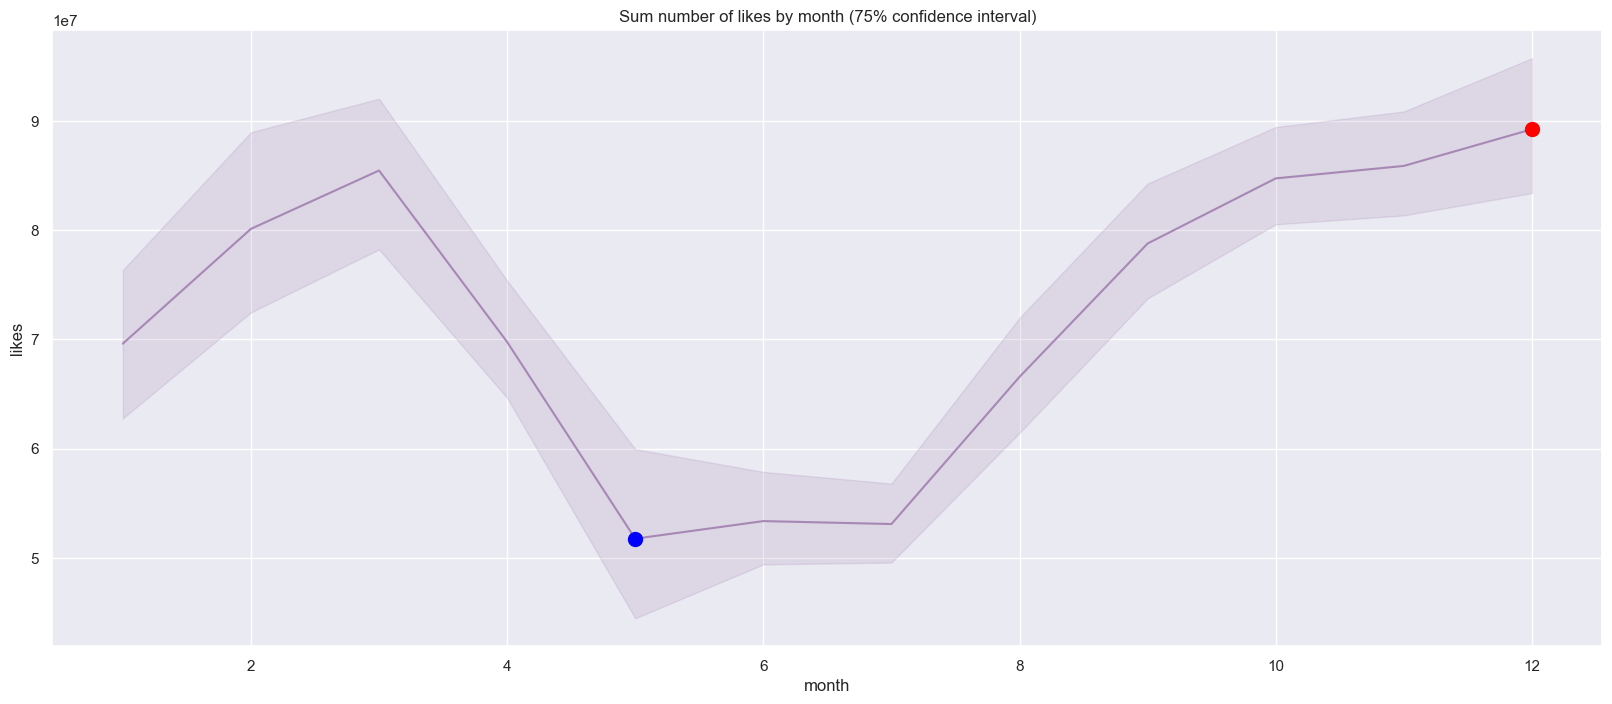

In [87]:
plot_agg_simple(agg_name="Average", agg_function=np.mean, ci=75)
plot_agg_simple(agg_name="Median", agg_function=np.median, ci=75)
plot_agg_simple(agg_name="Sum", agg_function=np.sum, ci=75)

In [88]:
# Correlation between likes and comments
correlation = df_['likes'].corr(df_['comments'])
print(f"Correlation between likes and comments: {correlation}")

# Sample calculation: Engagement rate (assuming comments and likes represent total engagement)
# If you have follower data, adjust the calculation accordingly
df_['engagement'] = df_['comments'] + df_['likes']
engagement_rate = df_['engagement'].sum() / len(df_)
print(f"Sample Engagement Rate: {engagement_rate}")

# Explore data for specific timeframes (weekly example)
weekly_data = df_.resample('W-SUN', on='post_timestamp')['likes', 'comments'].sum()
print(weekly_data.describe())  # Analyze weekly data

Correlation between likes and comments: 0.29774848127402975
Sample Engagement Rate: 3996.3247710973797
              likes       comments
count  3.660000e+02     366.000000
mean   2.372474e+06   48360.177596
std    4.809048e+06  104473.194885
min    0.000000e+00       0.000000
25%    0.000000e+00       0.000000
50%    5.766500e+03     141.500000
75%    1.347784e+06   26907.750000
max    2.133372e+07  984617.000000
